In [1]:
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

file_download = drive.CreateFile({'id':'1XAgCA1FavPa6lSyaG00lsn8Qkui-HqEq'})

file_download.GetContentFile('titanic-passengers.csv')

# **Instllation package and importing package**

In [3]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 68.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=7549edae84e6e48e2e2ea7c3aa1a9fbd0462ad7276f17cfe7926fc7e79a7a339
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.0
    Uninstalling pydantic-2.

In [4]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt


<ipython-input-4-35d8c6ee375d>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [5]:
df = pd.read_csv('titanic-passengers.csv', delimiter=';')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [8]:
for i in df.columns:
  if df[i].dtype == object:
    print(df.groupby(i)[i].count() >1)
    print('\n')

Survived
No     True
Yes    True
Name: Survived, dtype: bool


Name
Abbing, Mr. Anthony                      False
Abbott, Mr. Rossmore Edward              False
Abbott, Mrs. Stanton (Rosa Hunt)         False
Abelson, Mr. Samuel                      False
Abelson, Mrs. Samuel (Hannah Wizosky)    False
                                         ...  
de Mulder, Mr. Theodore                  False
de Pelsmaeker, Mr. Alfons                False
del Carlo, Mr. Sebastiano                False
van Billiard, Mr. Austin Blyler          False
van Melkebeke, Mr. Philemon              False
Name: Name, Length: 891, dtype: bool


Sex
female    True
male      True
Name: Sex, dtype: bool


Ticket
110152          True
110413          True
110465          True
110564         False
110813         False
               ...  
W./C. 6608      True
W./C. 6609     False
W.E.P. 5734    False
W/C 14208      False
WE/P 5735       True
Name: Ticket, Length: 681, dtype: bool


Cabin
A10    False
A14    False
A16   

#**⚛ Preprocessing**

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## -> clean data type

In [10]:
#replace 'No' and 'Yes' by 0 and 1 in "Survived" column
df['Survived'] = df['Survived'].map({'No':0, 'Yes':1})

In [11]:
# replace 'male' and 'female' by 1 and 0 in "Sex" column
df['Sex'] = df['Sex'].map({'male':1, 'female':0})

In [12]:
# replace all object values by numerical values in "Ticket" column
encode = LabelEncoder()
df['Ticket'] = encode.fit_transform(df['Ticket'])

In [13]:
# replace all object values by numerical values in "Cabin" column
df['Cabin'] = encode.fit_transform(df['Cabin'])

In [14]:
# replace all object values by numerical values in "Embarked" column
df['Embarked'] = encode.fit_transform(df['Embarked'])

##-> Handle missing value

In [15]:
# fill Nan value by mean in "Age" column
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

In [16]:
# fill Nan values by mode in "Embarked"column
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

In [17]:
# drop "Cabin" column because there are more missing values (687 missing value)
df.drop('Cabin', axis=1, inplace=True)

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,159,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,347,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,409,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,395,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,569,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,132,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,197,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,260,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,361,7.8958,2


#**⚛ Define Features and Target**

In [19]:
features = [i for i in df.columns if i not in ['PassengerId', 'Survived', 'Name']]
target = 'Survived'

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,159,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,347,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,409,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,395,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,569,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,132,30.0708,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,197,7.2292,0
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,260,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,361,7.8958,2


#**⚛ Data Visualization**

In [21]:
!pip install plotly==5.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 73.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [22]:
import plotly.express as px
import plotly.graph_objs as pgo
import plotly.offline as pyo
import plotly.graph_objects as pgobj

In [50]:
class_features = [i for i in features if i not in ['Fare']]
linear_features = ['Fare']
# here we have classification value (numerical) and linear value
print('classification values : ', class_features)
print('linear values : ', linear_features)

classification values :  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked']
linear values :  ['Fare']


In [24]:
for feat in class_features:
  fig = px.histogram(df, x=feat, color='Survived', barmode='group')
  fig.show()
  print()

In [25]:
for feat in linear_features:
  fig = px.scatter(df, x=feat, y=target)
  fig.show()
  print()

#**⚛ Choose the best features**

In [26]:
from scipy.stats import pearsonr

In [27]:
P_values = []
P_coefs = []
for feat in features:
  p_coef, p_value = pearsonr(df[feat], df[target])

  P_values.append(p_value)
  P_coefs.append(p_coef)

df_pearson = pd.DataFrame({'features':features, 'p values':P_values, 'p coefs':P_coefs})
df_pearson

,features,p values,p coefs
0,Pclass,2.537047e-25,-0.338481
1,Sex,1.406066e-69,-0.543351
2,Age,3.496470e-02,-0.070657
3,SibSp,2.922439e-01,-0.035322
4,Parch,1.479925e-02,0.081629
5,Ticket,7.871168e-07,-0.164549
6,Fare,6.120189e-15,0.257307
7,Embarked,9.242236e-07,-0.163517


In [28]:
best_features = df_pearson[df_pearson['p values']<0.02]['features'].values
best_features

array(['Pclass', 'Sex', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype=object)

# **Define x train and y train**

In [29]:
x_train = df[best_features]
y_train = df[target]

# **Part 1 : Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

## 1.1 Apply Logistic Regression

In [31]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

In [32]:
confusion_matrix(y_train, y_pred)

array([[468,  81],
       [ 98, 244]])

In [33]:
roc_auc_score(y_train, y_pred)

0.7829546543955517

#**Part 2 : KNN**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## 2.1 Apply KNN and predict model

In [35]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_train)
score = accuracy_score(y_pred, y_train)
score

0.7946127946127947

## 2.2 Choose the optimal number of neighbors

In [36]:
neighbors_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
score_list = []
for neighbors in neighbors_list:
  model_knn = KNeighborsClassifier(n_neighbors=neighbors)
  model_knn.fit(x_train, y_train)
  y_pred = model_knn.predict(x_train)
  score = accuracy_score(y_train, y_pred)
  score_list.append(score)

In [37]:
print(score_list)

[0.8496071829405163, 0.8316498316498316, 0.7934904601571269, 0.7946127946127947, 0.7811447811447811, 0.7800224466891134, 0.7575757575757576, 0.7676767676767676, 0.7530864197530864, 0.7508417508417509, 0.7485970819304153, 0.7485970819304153, 0.745230078563412, 0.7463524130190797]


In [38]:
index_max = score_list.index(max(score_list))
best_neighbors = neighbors_list[index_max]

In [39]:
best_model_knn = KNeighborsClassifier(n_neighbors=best_neighbors)
best_model_knn.fit(x_train, y_train)
y_pred2 = best_model_knn.predict(x_train)

In [40]:
print(y_pred2)

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 

#**Part 3 : Decision Tree and Random Forest**

In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz

## 3.1 Apply Decision Tree and predict model

In [42]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
score1 = accuracy_score(y_pred, y_train)
score1

0.9921436588103255

## 3.2 Plot the Decision Tree

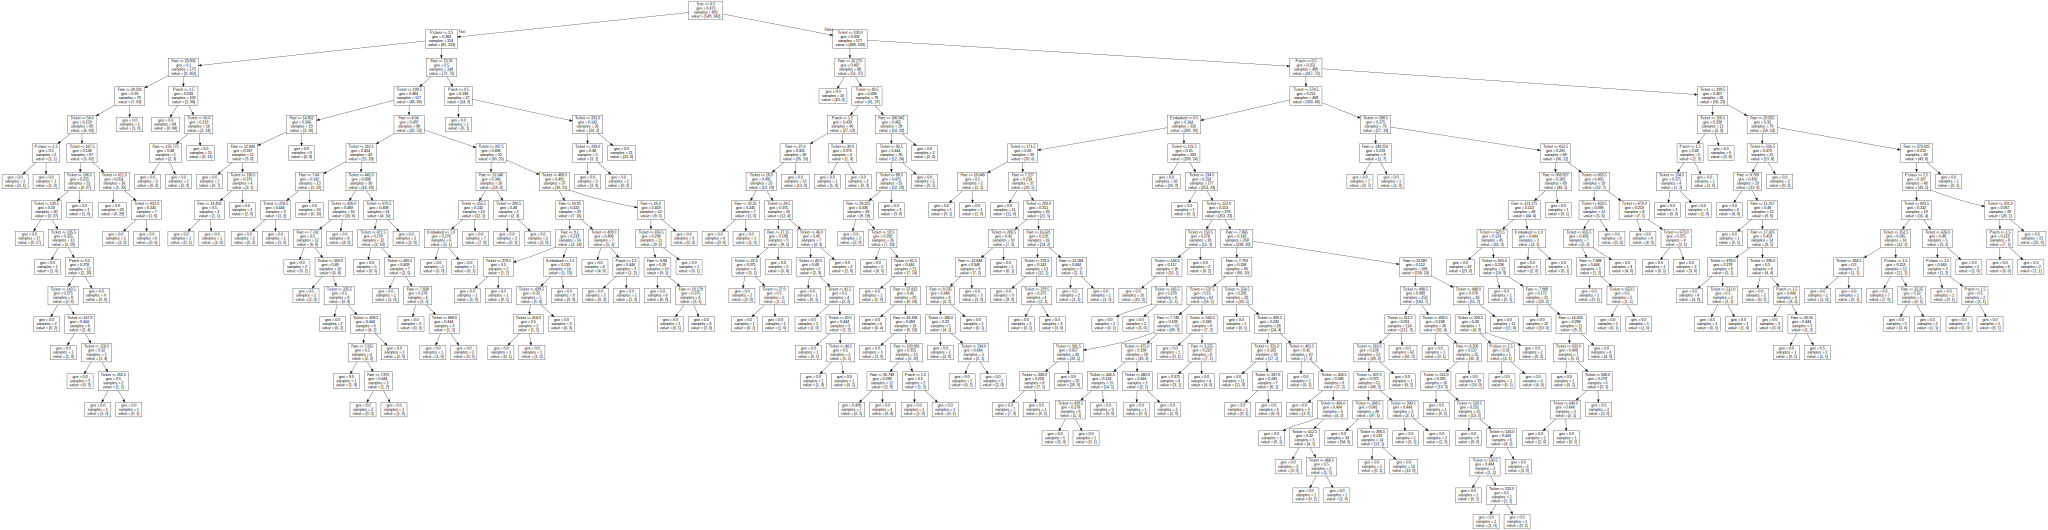

In [43]:
dot_data = export_graphviz(model, feature_names=best_features)
graph = graphviz.Source(dot_data)
graph.render('data.pdf')
graph

## 3.3 Change the Decision Tree parameter

In [44]:
model_2 = DecisionTreeClassifier(max_depth=20, max_leaf_nodes=200, min_samples_split=2, ccp_alpha=0.0001)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_train)
score2 = accuracy_score(y_pred_2, y_train)
score2

0.9921436588103255

## 3.4 compare the result

In [45]:
if score1>score2:
  print('score1 is best score')
elif score2>score1:
  print('score2 est best score')
else:
  print('score have same value')

score have same value


In [46]:
'''
  we have the first score = 0.9921436588103255 AND the second score = 0.9921436588103255
'''

'\n  we have the first score = 0.9921436588103255 AND the second score = 0.9921436588103255\n'

## 3.5 Random Forest

In [47]:
model_ensemble = RandomForestClassifier()
model_ensemble.fit(x_train, y_train)
y_pred = model_ensemble.predict(x_train)
score1 = accuracy_score(y_pred, y_train)
score1

0.9921436588103255

In [48]:
# we change the number of estimators
model_ensemble2 = RandomForestClassifier(n_estimators=200)
model_ensemble2.fit(x_train, y_train)
y_pred2 = model_ensemble2.predict(x_train)
score2 = accuracy_score(y_pred, y_train)
score2

0.9921436588103255

## 3.6 Calculate and compare accuracy

In [49]:
'''
 whenever the number of estimators, the accuracy don't change
'''

"\n whenever the number of estimators, the accuracy don't change\n"